In [1]:
from matplotlib import cm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (12,9)

In [2]:
N = 1000
M = 41000

pp = PdfPages(f'multipage{M}.pdf')

E = 10.0
r = 0.1
sigma = 0.4
T = 0.25

S = np.linspace(0, 3*E, N+1)
t = np.linspace(0, T, M, endpoint=False)

appr = np.genfromtxt(f'{N}{M}.csv', delimiter=',')[:,:-1].T

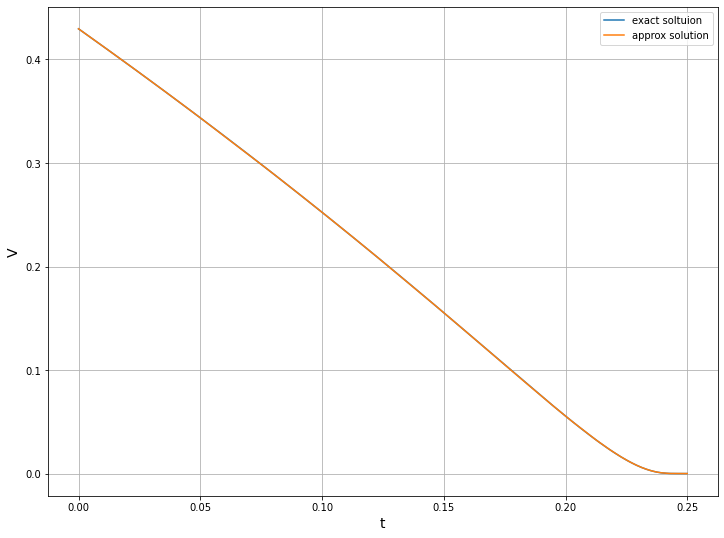

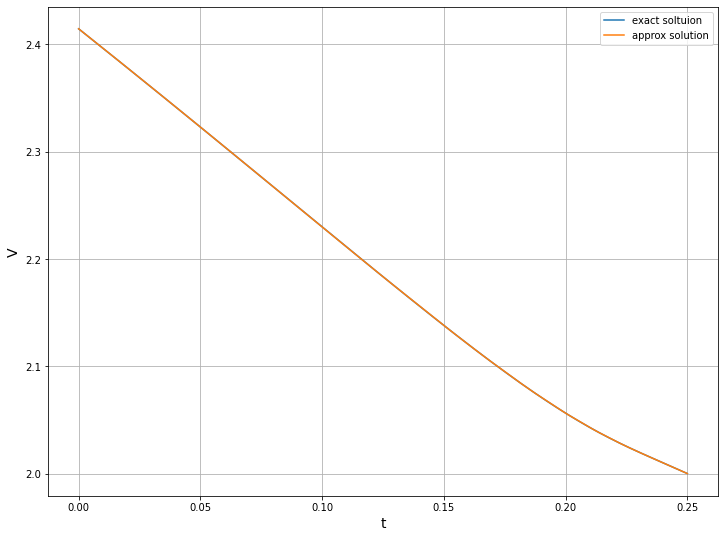

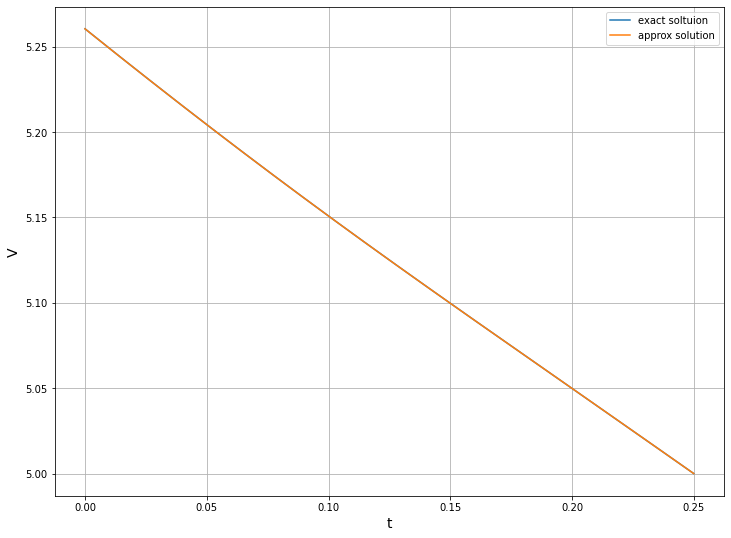

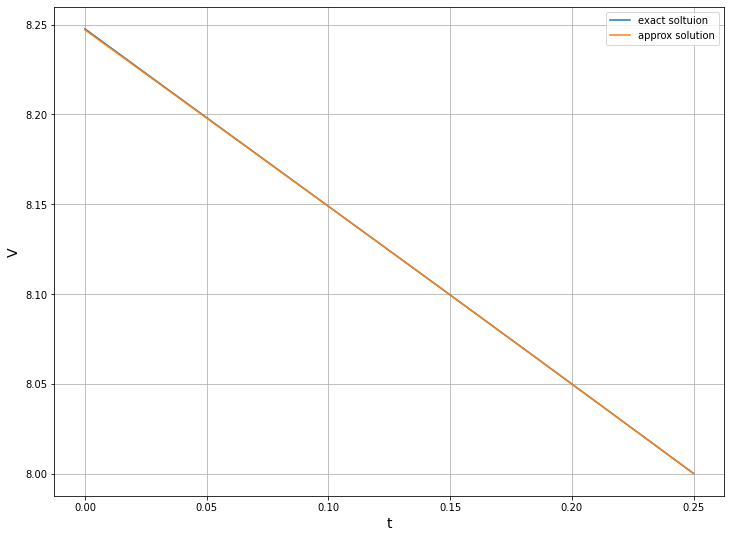

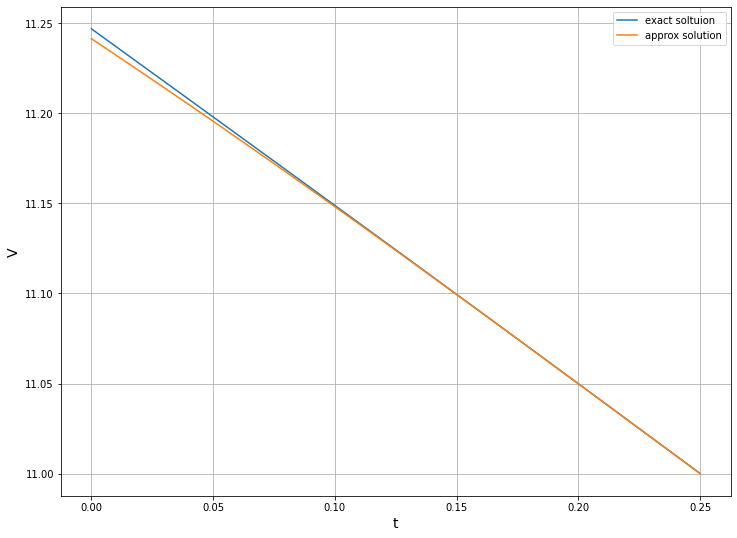

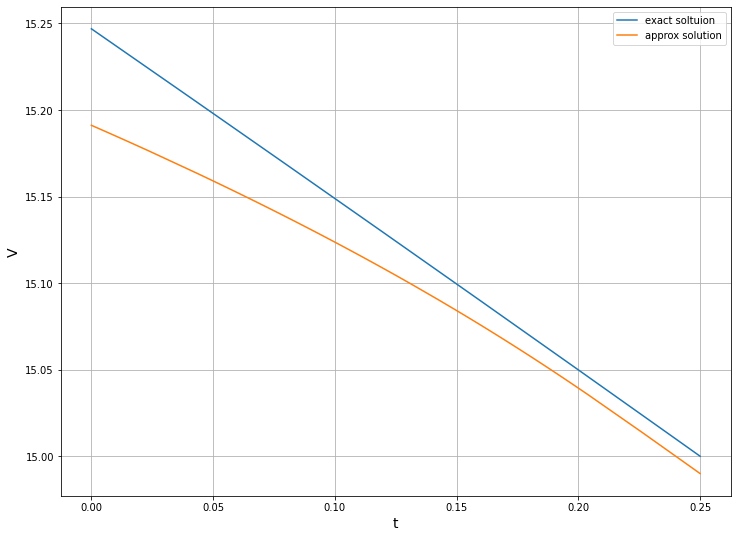

In [3]:
i = lambda x: int(x*N/(3*E)) 
for S_ in [9, 12, 15, 18, 21, 25]:
    d1 = (np.log(S_/E) + (r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = (np.log(S_/E) + (r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    V = S_*norm.cdf(d1)-E*np.exp(-r*(T-t))*norm.cdf(d2)
    
    plt.plot(t, V, label='exact soltuion')
    plt.plot(t[::-1], appr[i(S_),:], label='approx solution')
    plt.xlabel('t', fontsize=14)
    plt.ylabel('V', fontsize=14)
    plt.grid()
    plt.legend()
    plt.show()

<ipython-input-4-fc5b79d4cdf7>:1: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/E) + (r+0.5*sigma**2)*(T-T/2))/(sigma*np.sqrt(T-T/2))
<ipython-input-4-fc5b79d4cdf7>:2: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(S/E) + (r-0.5*sigma**2)*(T-T/2))/(sigma*np.sqrt(T-T/2))


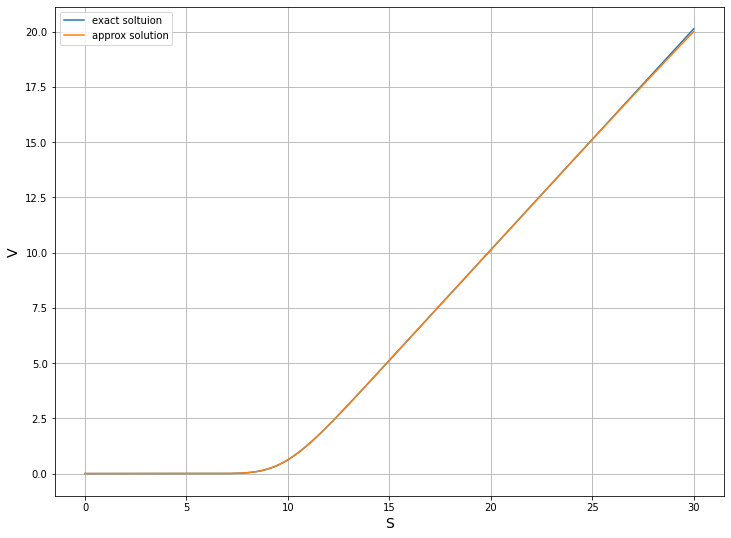

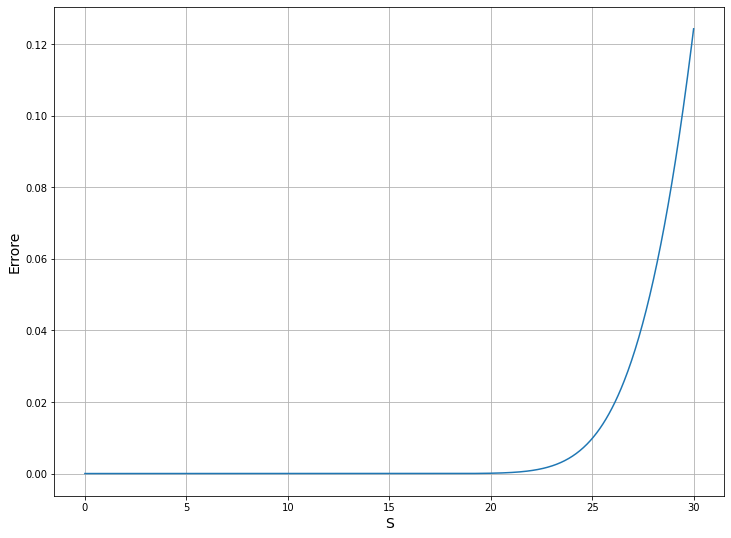

In [4]:
d1 = (np.log(S/E) + (r+0.5*sigma**2)*(T-T/2))/(sigma*np.sqrt(T-T/2))
d2 = (np.log(S/E) + (r-0.5*sigma**2)*(T-T/2))/(sigma*np.sqrt(T-T/2))
V = S*norm.cdf(d1)-E*np.exp(-r*(T-T/2))*norm.cdf(d2)

plt.plot(S, V, label='exact soltuion')
plt.plot(S, appr[:,M//2], label='approx solution')
plt.xlabel('S', fontsize=14)
plt.ylabel('V', fontsize=14)
plt.grid()
plt.legend()
pp.savefig()
plt.show()

plt.plot(S, V-appr[:,M//2])
plt.xlabel('S', fontsize=14)
plt.ylabel('Errore', fontsize=14)
plt.grid()
pp.savefig()
plt.show()

<ipython-input-5-0f49c90ceee9>:12: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(Y/E) + (r+0.5*sigma**2)*(T-X))/(sigma*np.sqrt(T-X))
<ipython-input-5-0f49c90ceee9>:13: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(Y/E) - (r+0.5*sigma**2)*(T-X))/(sigma*np.sqrt(T-X))


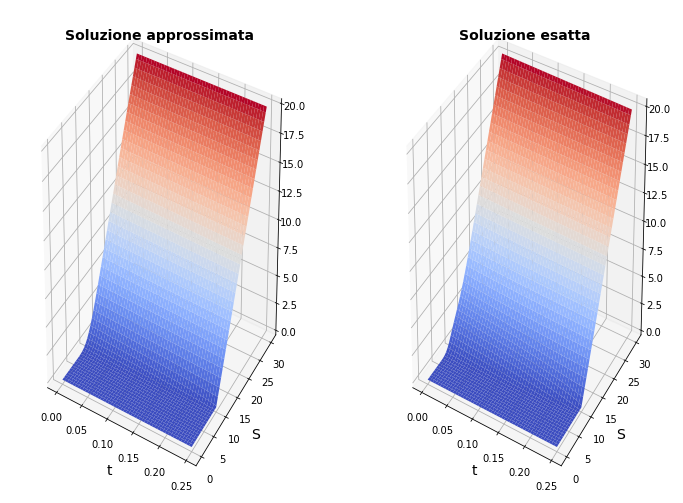

In [5]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

X, Y = np.meshgrid(t[::-1], S)
ax.plot_surface(X, Y, appr, cmap=cm.coolwarm, 
                linewidth=0, antialiased=True)
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('S', fontsize=14)
ax.set_title('Soluzione approssimata', weight='bold', fontsize=14)

X, Y = np.meshgrid(t, S)
d1 = (np.log(Y/E) + (r+0.5*sigma**2)*(T-X))/(sigma*np.sqrt(T-X))
d2 = (np.log(Y/E) - (r+0.5*sigma**2)*(T-X))/(sigma*np.sqrt(T-X))

V = Y*norm.cdf(d1)-E*np.exp(-r*(T-X))*norm.cdf(d2)

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, V, cmap=cm.coolwarm, 
                linewidth=0, antialiased=True)
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('S', fontsize=14)
ax.set_title('Soluzione esatta', weight='bold', fontsize=14)
pp.savefig()
plt.show()

In [6]:
pp.close()